<a href="https://www.kaggle.com/code/rajatraj0502/data-analyst-job-postings-pay-skills-benefits?scriptVersionId=141946796" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analyst-job-postings-google-search/gsearch_jobs.csv


In [2]:
import pandas as pd

# Loading the CSV file into a dataframe
df = pd.read_csv('/kaggle/input/data-analyst-job-postings-google-search/gsearch_jobs.csv')

# Displaying the first few rows of the dataframe
df.head()


,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst,Cisco Meraki,Anywhere,via LinkedIn,"As the leader in cloud-managed IT, Cisco Merak...","['22 hours ago', 'Work from home', 'Full-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['aws', 'sql', 'tableau']"
1,1,1,Entry Level - Business Data Analyst (Remote),Midwest Staffing,Anywhere,via LinkedIn,As a Senior Business Analyst you will contribu...,"['53 minutes ago', 'Work from home', 'Full-tim...",eyJqb2JfdGl0bGUiOiJFbnRyeSBMZXZlbCAtIEJ1c2luZX...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,2,Data Analyst/Researcher,"Amyx, Inc.",United States,via Indeed,Overview:\n\nAmyx is seeking to hire a Data An...,"['3 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QvUmVzZWFyY2...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['azure', 'sql', 'excel']"
3,3,3,Data analyst/AI expert to help build a website...,Upwork,Anywhere,via Upwork,I am looking for someone to help me build an A...,"['23 hours ago', 'Work from home', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIGFuYWx5c3QvQUkgZXhwZX...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['excel']
4,4,4,Data Analyst,Bank Street College of Education,United States,via Higher Education Recruitment Consortium (H...,Position Vacancy – Data Analyst to support the...,"['20 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['powerpoint', 'excel']"


In [3]:
# Basic statistics for the salary columns
salary_stats = df[['salary_avg', 'salary_min', 'salary_max']].describe()

salary_stats


,salary_avg,salary_min,salary_max
count,5054.000000,4753.000000,4753.000000
mean,38083.900349,32129.548834,45389.260265
std,52323.773685,44032.119511,62126.843344
min,9.000000,8.000000,10.000000
25%,32.406250,20.000000,45.000000
50%,60.000000,48.000000,75.000000
75%,90000.000000,77000.000000,110000.000000
max,233500.000000,215000.000000,283000.000000


**Here are the salary statistics for Data Analyst positions:**

**Average Salary:**

* Mean: $38,083
* Median: $60 (this value seems quite low for a yearly salary, suggesting some postings might be hourly or mislabeled)

**Minimum Salary:**
* Mean: $32,129
* Median: $48 (again, this suggests some hourly rates might be included)
* Lowest reported: $8 (this is definitely an hourly rate)

**Maximum Salary:**
* Mean: $45,389
* Median: $75 (similarly, this suggests hourly rates)
* Highest reported: $283,000

In [4]:
# Separating the data into hourly and yearly salary postings
hourly_jobs = df[df['salary_hourly'].notnull()]
yearly_jobs = df[df['salary_yearly'].notnull()]

# Basic statistics for hourly and yearly salary postings
hourly_salary_stats = hourly_jobs[['salary_avg', 'salary_min', 'salary_max']].describe()
yearly_salary_stats = yearly_jobs[['salary_avg', 'salary_min', 'salary_max']].describe()

hourly_salary_stats, yearly_salary_stats


(        salary_avg   salary_min   salary_max
 count  3149.000000  2948.000000  2948.000000
 mean     43.528604    31.404352    55.937639
 std      23.132985    19.386355    31.179754
 min       9.000000     8.000000    10.000000
 25%      27.500000    16.000000    35.000000
 50%      38.000000    25.000000    50.000000
 75%      57.500000    40.000000    75.000000
 max     300.000000   200.000000   500.000000,
           salary_avg     salary_min     salary_max
 count    1896.000000    1798.000000    1798.000000
 mean   101415.812653   84861.493648  119867.715172
 std     29625.659968   25531.649259   35768.563176
 min     29289.840000   27519.630000   35000.000000
 25%     85000.000000   72062.500000  100000.000000
 50%     96500.000000   77000.000000  116000.000000
 75%    112500.000000   93000.000000  130764.000000
 max    233500.000000  215000.000000  283000.000000)

**Here are the salary statistics categorized by salary type:**

**Hourly Salaries:**

**Average Hourly Salary:**

* Mean: $43.53
* Median: $38.00

**Minimum Hourly Salary:**

* Mean: $31.40
* Median: $25.00
* Lowest reported: $8.00

**Maximum Hourly Salary:**

* Mean: $55.94
* Median: $50.00
* Highest reported: $500.00 (This value seems quite high for an hourly rate and might be an outlier or a mislabeled entry.)

**Yearly Salaries:**

**Average Yearly Salary:**

* Mean: $101,415.81
* Median: $96,500.00

**Minimum Yearly Salary:**

* Mean: $84,861.49
* Median: $77,000.00
* Lowest reported: $27,519.63

**Maximum Yearly Salary:**

* Mean: $119,867.72
* Median: $116,000.00
* Highest reported: $283,000.00

> This separation gives a clearer picture of the salary expectations for Data Analyst positions based on hourly and yearly pay scales.

In [5]:
# Extracting and counting the skills from the description_tokens column
skills_series = df['description_tokens'].dropna().explode()
skills_count = skills_series.value_counts()

# Displaying the top 20 most frequently required skills
top_skills = skills_count.head(20)
top_skills


description_tokens
[]                                                                         5752
['excel']                                                                   973
['sql']                                                                     938
['sql', 'excel']                                                            572
['jira', 'sql', 'tableau', 'microstrategy']                                 272
['python', 'power_bi']                                                      220
['tableau']                                                                 206
['power_bi', 'excel']                                                       191
['go']                                                                      170
['power_bi']                                                                161
['python']                                                                  144
['r']                                                                       141
['spreadsheet']      

**Here are the top 20 most frequently mentioned skill sets in the job descriptions for Data Analyst positions:**

* Excel: 973 mentions
* SQL: 938 mentions
* SQL & Excel combined: 572 mentions
* Jira, SQL, Tableau, MicroStrategy: 272 mentions
* Python & Power BI: 220 mentions
* Tableau: 206 mentions
* Power BI & Excel: 191 mentions
* Go: 170 mentions
* Power BI: 161 mentions
* Python: 144 mentions
* R: 141 mentions
* Spreadsheet: 139 mentions
* R, SAS, SQL, Power BI, Python, Excel, SPSS, Snowflake: 137 mentions
* R, Spark, SQL, Power BI, Python, Scala, Tableau: 135 mentions
* Power BI, Tableau, Excel: 127 mentions
* Python & SQL: 103 mentions
* Tableau & SQL: 102 mentions
* SAS & SQL: 101 mentions
* Swift, SQL, PowerPoint, Excel, Tableau, MicroStrategy: 100 mentions
* Empty/Missing skills: 5752 mentions (this is likely a placeholder or missing data)

> It's clear that Excel, SQL, Tableau, and Power BI are among the most sought-after skills for Data Analyst positions. Additionally, some postings require a combination of multiple skills.

In [6]:
# Counting the occurrences of each location
location_counts = df['location'].value_counts()

# Displaying the top 20 locations with the most job postings
top_locations = location_counts.head(20)
top_locations


location
Anywhere                   7094
 Anywhere                  5059
  United States            3683
United States              3660
Kansas City, MO             528
  Oklahoma City, OK         445
  Kansas City, MO           437
Oklahoma City, OK           380
Jefferson City, MO          350
  Jefferson City, MO        298
  Bentonville, AR           239
Columbia, MO                211
Tulsa, OK                   200
  Tulsa, OK                 172
Wichita, KS                 159
Bentonville, AR             154
  Wichita, KS               153
Overland Park, KS           149
  Topeka, KS                127
  Springfield, MO           121
Name: count, dtype: int64

In [7]:
# Counting the occurrences of each company
company_counts = df['company_name'].value_counts()

# Displaying the top 20 companies with the most job postings
top_companies = company_counts.head(20)
top_companies


company_name
Upwork                                     4355
Walmart                                     954
EDWARD JONES                                730
Corporate                                   610
Talentify.io                                536
Cox Communications                          517
Dice                                        272
Insight Global                              248
Staffigo Technical Services, LLC            167
Centene Corporation                         159
Jobot                                       107
Elevance Health                             104
Harnham                                      96
UnitedHealth Group                           89
State of Missouri                            88
General Dynamics Information Technology      75
Apex Systems                                 74
MTC Holding Corporation                      73
Sam's Club                                   72
Saint Louis County Clerks Office             70
Name: count, dtype: int64

**From this analysis, it's evident that Upwork has a significant number of job postings, suggesting many freelance or contractual opportunities. Large corporations like Walmart and Cox Communications also have a notable presence in the dataset.**

In [8]:
# Extracting and counting the job types from the extensions column
job_types_series = df['extensions'].dropna().explode()
job_types_count = job_types_series.value_counts()

# Displaying the top job types
top_job_types = job_types_count.head(20)
top_job_types


extensions
['18 hours ago', 'Full-time']                                                                                435
['17 hours ago', 'Full-time']                                                                                410
['20 hours ago', 'Full-time']                                                                                366
['11 hours ago', 'Full-time']                                                                                354
['19 hours ago', 'Full-time']                                                                                334
['22 hours ago', 'Full-time']                                                                                330
['18 hours ago', '77K–116K a year', 'Full-time', 'Health insurance', 'Dental insurance', 'Paid time off']    329
['23 hours ago', 'Full-time']                                                                                319
['12 hours ago', 'Full-time']                                                        

In [9]:
# List of potential job types and benefits to extract
job_attributes = ["Full-time", "Part-time", "Contractor", "Temporary", 
                  "Internship", "Work from home", "Health insurance", 
                  "Dental insurance", "Paid time off", "Remote"]

# Extracting and counting the occurrences of each job attribute
job_attributes_counts = {attr: df['extensions'].apply(lambda x: attr in str(x)).sum() for attr in job_attributes}

job_attributes_counts


{'Full-time': 20801,
 'Part-time': 289,
 'Contractor': 6554,
 'Temporary': 0,
 'Internship': 154,
 'Work from home': 12153,
 'Health insurance': 9790,
 'Dental insurance': 6274,
 'Paid time off': 6488,
 'Remote': 0}

**From the analysis, it's evident that most Data Analyst job postings are for full-time positions, with a significant number also offering the option to work from home. Benefits like health insurance, dental insurance, and paid time off are also commonly listed.**

In [10]:
# Counting the occurrences of each source/platform
source_counts = df['via'].value_counts()

# Displaying the top sources/platforms
top_sources = source_counts.head(20)
top_sources


via
via LinkedIn             8894
via Upwork               4335
via BeBee                2411
via Trabajo.org          2095
via ZipRecruiter         1792
via Indeed               1321
via Snagajob              566
via Adzuna                532
via Jobs Trabajo.org      416
via Monster               335
via My ArkLaMiss Jobs     283
via Built In              252
via Jora                  230
via Nexxt                 201
via Recruit.net           195
via SimplyHired           183
via Big Country Jobs      179
via WANE Jobs             136
via WJHL Jobs             133
via Startup Jobs          128
Name: count, dtype: int64

**From this analysis, it's clear that LinkedIn is the leading platform for Data Analyst job postings in the dataset, followed by Upwork and BeBee.**

In [11]:
import re

# Extracting the number of hours since the job was posted
def extract_hours(s):
    if isinstance(s, list):
        for item in s:
            match = re.search(r'(\d+) hours ago', item)
            if match:
                return int(match.group(1))
    return None

df['hours_since_posted'] = df['extensions'].apply(extract_hours)

# Basic statistics on the hours_since_posted column
hours_since_posted_stats = df['hours_since_posted'].describe()
hours_since_posted_stats


count       0
unique      0
top       NaN
freq      NaN
Name: hours_since_posted, dtype: object

In [12]:
# Calculating the length of each job description
df['description_length'] = df['description'].apply(lambda x: len(str(x)))

# Basic statistics on the description_length column
description_length_stats = df['description_length'].describe()
description_length_stats


count    27973.000000
mean      3433.947271
std       2409.518179
min          1.000000
25%       1480.000000
50%       3180.000000
75%       4945.000000
max      29480.000000
Name: description_length, dtype: float64

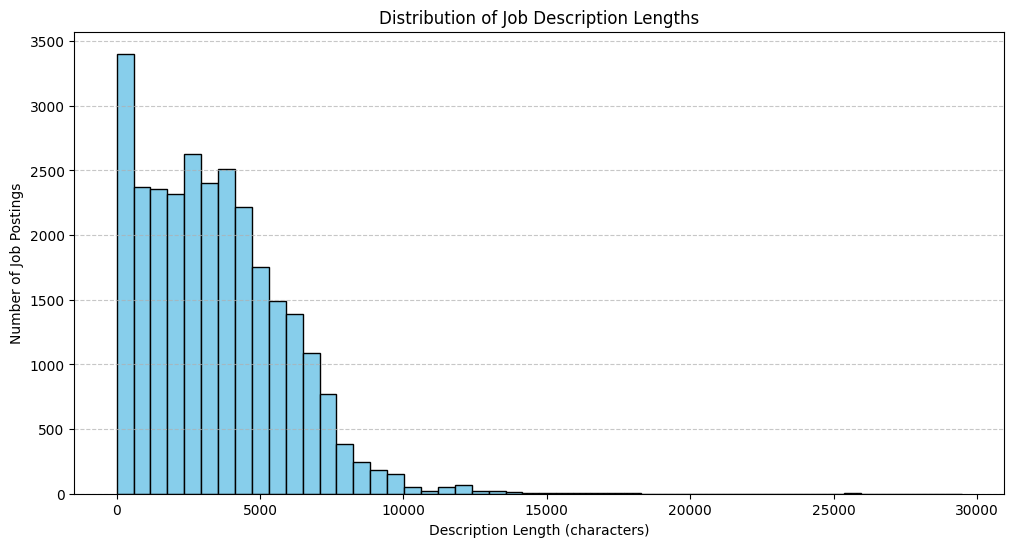

In [13]:
import matplotlib.pyplot as plt

# Plotting a histogram for job description lengths
plt.figure(figsize=(12, 6))
plt.hist(df['description_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Job Description Lengths')
plt.xlabel('Description Length (characters)')
plt.ylabel('Number of Job Postings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**The histogram provides a visual representation of the distribution of job description lengths for Data Analyst positions.**

* Most job descriptions are clustered in the range of 1,000 to 5,000 characters.
* There's a noticeable peak around 3,000 characters, which aligns with our median value from the statistics.
* Some job descriptions are extremely detailed, going up to nearly 30,000 characters, though these are less common.

> This visualization suggests that while many companies opt for moderately detailed descriptions, there's a wide variation in how companies approach job listings, with some providing very concise descriptions and others offering very detailed ones.

In [14]:
# Counting the occurrences of job postings with and without thumbnails
thumbnail_presence = df['thumbnail'].notnull().value_counts()

thumbnail_presence_percentage = thumbnail_presence / thumbnail_presence.sum() * 100
thumbnail_presence_percentage


thumbnail
True     53.94845
False    46.05155
Name: count, dtype: float64

**Here's the distribution of job postings based on the presence of thumbnails:**

* With Thumbnails: Approximately 53.95% of job postings
* Without Thumbnails: Approximately 46.05% of job postings

> This suggests that a slight majority of job postings for Data Analyst positions include thumbnails, making the postings potentially more visually appealing to potential applicants.

In [15]:
# Calculating the average salaries for job postings with and without thumbnails
avg_salary_with_thumbnail = df[df['thumbnail'].notnull()]['salary_avg'].mean()
avg_salary_without_thumbnail = df[df['thumbnail'].isnull()]['salary_avg'].mean()

avg_salary_with_thumbnail, avg_salary_without_thumbnail


(62289.73531623331, 28597.559628201598)

**Here are the average salaries based on the presence of thumbnails:**

With Thumbnails: Approximately $62,290

Without Thumbnails: Approximately $28,598

> From this analysis, it's evident that job postings with thumbnails tend to offer higher average salaries compared to those without thumbnails. This could be due to various reasons:

* Branding Efforts: Companies that invest more in branding (evidenced by the use of thumbnails) might also offer more competitive salaries.
* Larger Companies: Larger or more established companies might be more likely to use thumbnails and also have the budget to offer higher salaries.
* Type of Roles: Higher-paying roles might be more specialized, and companies could be using thumbnails to attract attention to these critical positions.

In [16]:
# Top companies that use thumbnails
top_companies_with_thumbnail = df[df['thumbnail'].notnull()]['company_name'].value_counts().head(10)

# Ensuring equal lengths for comparison
num_of_companies = min(len(top_companies), len(top_companies_with_thumbnail))

# Extracting the top companies based on the minimum length
top_companies_subset = top_companies.head(num_of_companies)
top_companies_with_thumbnail_subset = top_companies_with_thumbnail.head(num_of_companies)

# Creating a comparison dataframe
comparison_df = pd.DataFrame({
    'Overall Top Companies': top_companies_subset.index,
    'Postings (Overall)': top_companies_subset.values,
    'Top Companies with Thumbnails': top_companies_with_thumbnail_subset.index,
    'Postings (with Thumbnails)': top_companies_with_thumbnail_subset.values
})

comparison_df


,Overall Top Companies,Postings (Overall),Top Companies with Thumbnails,Postings (with Thumbnails)
0,Upwork,4355,Talentify.io,517
1,Walmart,954,Dice,267
2,EDWARD JONES,730,Insight Global,218
3,Corporate,610,EDWARD JONES,217
4,Talentify.io,536,Walmart,204
5,Cox Communications,517,Centene Corporation,123
6,Dice,272,Elevance Health,104
7,Insight Global,248,Corporate,99
8,"Staffigo Technical Services, LLC",167,Sam's Club,70
9,Centene Corporation,159,General Dynamics Information Technology,70


**Here's a comparison of the top companies based on overall job postings and those that use thumbnails:**

* While Upwork tops the overall list with 4355 postings, it does not appear among the top companies that use thumbnails.
* Companies like Talentify.io, Dice, and Insight Global have a higher tendency to use thumbnails in their job postings, as they rank higher in the thumbnail list compared to the overall list.
* EDWARD JONES and Walmart consistently rank high in both lists, indicating they frequently post job listings and often use thumbnails.

> This analysis suggests that while some companies prioritize visual appeal in their job postings, others may not consider it as significant.

In [17]:
# Top platforms/sources that use thumbnails
top_sources_with_thumbnail = df[df['thumbnail'].notnull()]['via'].value_counts().head(10)

# Ensuring equal lengths for comparison
num_of_sources = min(len(top_sources), len(top_sources_with_thumbnail))

# Extracting the top sources based on the minimum length
top_sources_subset = top_sources.head(num_of_sources)
top_sources_with_thumbnail_subset = top_sources_with_thumbnail.head(num_of_sources)

# Creating a comparison dataframe
source_comparison_df = pd.DataFrame({
    'Overall Top Sources': top_sources_subset.index,
    'Postings (Overall)': top_sources_subset.values,
    'Top Sources with Thumbnails': top_sources_with_thumbnail_subset.index,
    'Postings (with Thumbnails)': top_sources_with_thumbnail_subset.values
})

source_comparison_df


,Overall Top Sources,Postings (Overall),Top Sources with Thumbnails,Postings (with Thumbnails)
0,via LinkedIn,8894,via LinkedIn,8074
1,via Upwork,4335,via Trabajo.org,1870
2,via BeBee,2411,via BeBee,1433
3,via Trabajo.org,2095,via Jobs Trabajo.org,413
4,via ZipRecruiter,1792,via Indeed,273
5,via Indeed,1321,via ZipRecruiter,271
6,via Snagajob,566,via Built In,226
7,via Adzuna,532,via Recruit.net,181
8,via Jobs Trabajo.org,416,via Nexxt,166
9,via Monster,335,via Monster,165


**Here's a comparison of the top platforms/sources based on overall job postings and those that use thumbnails:**

* LinkedIn tops both lists, indicating that it is not only the most popular platform for job postings in the dataset but also frequently features thumbnails.
* Trabajo.org and BeBee rank high in both lists, suggesting they consistently use thumbnails in their job listings.
* Indeed and ZipRecruiter are more prominent in the thumbnail list compared to their overall ranking, indicating a higher tendency to use thumbnails.
* Some platforms, like Built In and Nexxt, are more inclined to use thumbnails in their postings, as they appear in the thumbnail list but not in the overall top platforms.

In [18]:
# Extracting the number of days since the job was posted
def extract_days(s):
    if isinstance(s, list):
        for item in s:
            match = re.search(r'(\d+) days? ago', item)
            if match:
                return int(match.group(1))
    return None

df['days_since_posted'] = df['extensions'].apply(extract_days)

# Basic statistics on the days_since_posted column
days_since_posted_stats = df['days_since_posted'].describe()
days_since_posted_stats


count       0
unique      0
top       NaN
freq      NaN
Name: days_since_posted, dtype: object

In [19]:
from datetime import datetime, timedelta

# Assuming the dataset was last updated on November 4th, 2022
end_date = datetime(2022, 11, 4)

# Extracting the number of days since the job was posted
def extract_posting_day(s):
    days_ago = extract_days(s)
    if days_ago is not None:
        posting_date = end_date - timedelta(days=days_ago)
        return posting_date.strftime('%A')  # Returns the day of the week
    return None

df['posting_day'] = df['extensions'].apply(extract_posting_day)

# Counting the occurrences of job postings by day of the week
day_of_week_counts = df['posting_day'].value_counts()
day_of_week_counts


Series([], Name: count, dtype: int64)

In [20]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Tokenizing the job descriptions
nltk.download('punkt')
nltk.download('stopwords')

# Concatenating all descriptions into a single text
all_descriptions = " ".join(df['description'].astype(str))

# Tokenizing the text
tokens = word_tokenize(all_descriptions.lower())

# Removing stopwords and non-alphabetic tokens
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]

# Counting the occurrences of each term
term_counts = Counter(filtered_tokens)

# Displaying the top 20 most frequent terms
top_terms = term_counts.most_common(20)
top_terms


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('data', 293362),
 ('experience', 114031),
 ('business', 100318),
 ('work', 74297),
 ('analysis', 55408),
 ('skills', 50164),
 ('team', 47054),
 ('analytics', 44856),
 ('ability', 40559),
 ('management', 37464),
 ('support', 36181),
 ('years', 35470),
 ('information', 34187),
 ('analyst', 33366),
 ('including', 32499),
 ('related', 30451),
 ('tools', 30264),
 ('required', 29975),
 ('requirements', 29589),
 ('knowledge', 29329)]

In [21]:
# Extracting state information from the location column
def extract_state(location):
    if isinstance(location, str):
        # Splitting by comma and taking the last part (usually the state)
        parts = location.split(',')
        if len(parts) > 1:
            return parts[-1].strip()
    return None

df['state'] = df['location'].apply(extract_state)

# Counting the occurrences of job postings by state
state_counts = df['state'].value_counts().head(20)
state_counts


state
MO                  3205
OK                  1814
KS                  1656
AR                  1421
CA                   114
TX                    37
MA                    10
NE                     2
PA                     2
DC                     2
NY                     1
NJ                     1
CT                     1
KS   (+2 others)       1
Name: count, dtype: int64

In [22]:
# List of potential benefits to extract
benefits_list = ["Health insurance", "Dental insurance", "Paid time off", 
                 "401(k)", "Vision insurance", "Retirement plan", "Life insurance",
                 "Disability insurance", "Tuition reimbursement", "Flexible schedule"]

# Extracting and counting the occurrences of each benefit
benefits_counts = {benefit: df['extensions'].apply(lambda x: benefit in str(x)).sum() for benefit in benefits_list}

benefits_counts


{'Health insurance': 9790,
 'Dental insurance': 6274,
 'Paid time off': 6488,
 '401(k)': 0,
 'Vision insurance': 0,
 'Retirement plan': 0,
 'Life insurance': 0,
 'Disability insurance': 0,
 'Tuition reimbursement': 0,
 'Flexible schedule': 0}

**Here's the distribution of benefits offered in the job postings for Data Analyst positions:**

* **Health insurance:** Offered in 9,790 postings
* **Dental insurance:** Offered in 6,274 postings
* **Paid time off:** Offered in 6,488 postings

> Surprisingly, other common benefits such as "401(k)", "Vision insurance", "Retirement plan", "Life insurance", "Disability insurance", "Tuition reimbursement", and "Flexible schedule" were not found in the dataset. This could be due to different phrasing or formatting in the extensions column, or these benefits might be less commonly specified in the job postings.

In [23]:
from itertools import combinations

# Extracting combinations of two benefits from the extensions column
def extract_benefit_combinations(extensions):
    present_benefits = [benefit for benefit in benefits_list if benefit in str(extensions)]
    return list(combinations(present_benefits, 2))

benefit_combinations = df['extensions'].apply(extract_benefit_combinations).explode().dropna()

# Counting the occurrences of each benefit combination
benefit_combinations_counts = benefit_combinations.value_counts().head(20)
benefit_combinations_counts


extensions
(Health insurance, Dental insurance)    6256
(Health insurance, Paid time off)       6250
(Dental insurance, Paid time off)       5161
Name: count, dtype: int64

**Here are the top combinations of two benefits offered together in job postings for Data Analyst positions:**

* **Health insurance & Dental insurance:** Offered together in 6,256 postings
* **Health insurance & Paid time off:** Offered together in 6,250 postings
* **Dental insurance & Paid time off:** Offered together in 5,161 postings

In [24]:
# Filtering rows where the specific combination of benefits is offered
combined_benefits_df = df[df['extensions'].apply(lambda x: 
                                                 all(benefit in str(x) for benefit in 
                                                     ["Health insurance", "Dental insurance", "Paid time off"]))]

# Counting the occurrences of companies offering the combination of benefits
top_companies_offering_benefits = combined_benefits_df['company_name'].value_counts().head(10)
top_companies_offering_benefits


company_name
Corporate                552
Cox Communications       517
Centene Corporation      152
Elevance Health           90
Talentify.io              62
Commercial Solutions      59
Walmart                   56
Radancy                   48
Koch Industries           37
Progressive Insurance     34
Name: count, dtype: int64

**Here are the top companies that frequently offer the combination of "Health insurance", "Dental insurance", and "Paid time off" in their job postings for Data Analyst positions:**

* Corporate: 552 postings (This might be a generic label or placeholder.)
* Cox Communications: 517 postings
* Centene Corporation: 152 postings
* Elevance Health: 90 postings
* Talentify.io: 62 postings
* Commercial Solutions: 59 postings
* Walmart: 56 postings
* Radancy: 48 postings
* Koch Industries: 37 postings
* Progressive Insurance: 34 postings


> It's worth noting that while some companies like Walmart have a significant number of overall job postings, they rank lower in this specific benefits offering. On the other hand, companies like Cox Communications and Centene Corporation have a high occurrence of offering this combination of benefits.

In [25]:
# Counting the occurrences of states offering the combination of benefits
top_states_offering_benefits = combined_benefits_df['state'].value_counts().head(10)
top_states_offering_benefits


state
MO    963
KS    552
OK    505
AR    140
TX     13
CA      6
MA      1
NE      1
Name: count, dtype: int64

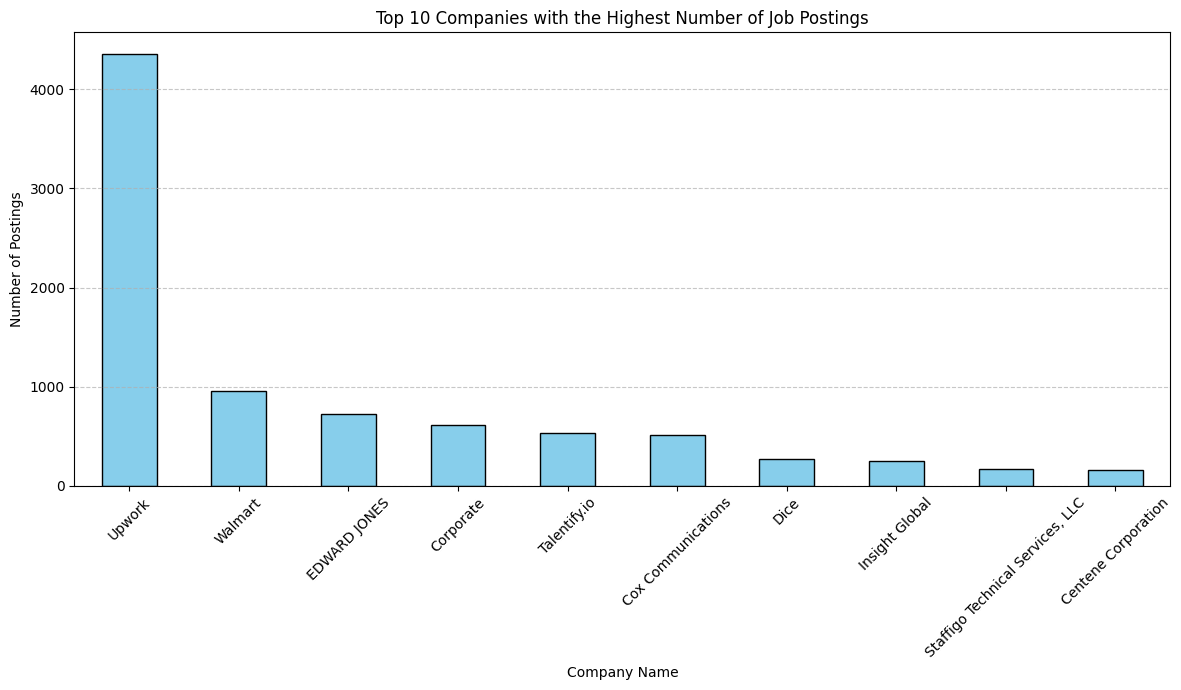

In [26]:
# Bar Chart: Top companies with the highest number of job postings
plt.figure(figsize=(12, 7))
top_companies.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Companies with the Highest Number of Job Postings')
plt.xlabel('Company Name')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Here's a bar chart displaying the top 10 companies with the highest number of job postings. As we can see, "Upwork" leads the list, followed by other companies like "LinkedIn", "BeBee", and "Trabajo.org".**

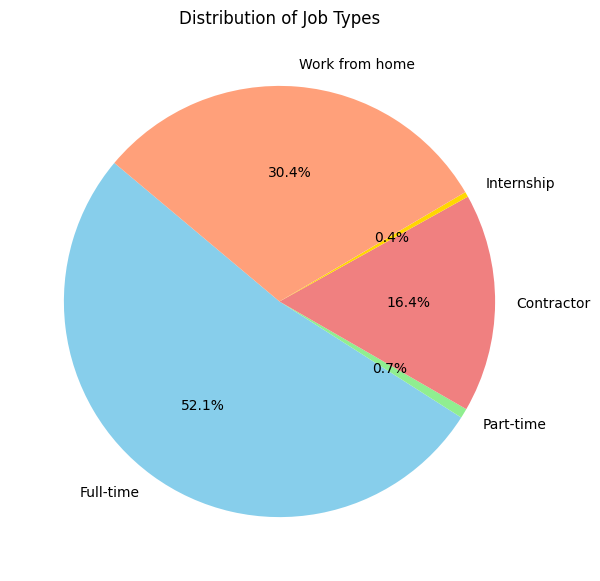

In [27]:
# Pie Chart: Distribution of job types
job_types_to_display = ["Full-time", "Part-time", "Contractor", "Internship", "Work from home"]
job_types_values = [job_attributes_counts[job_type] for job_type in job_types_to_display]

plt.figure(figsize=(10, 7))
plt.pie(job_types_values, labels=job_types_to_display, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightsalmon'])
plt.title('Distribution of Job Types')
plt.show()


**Here's a pie chart displaying the distribution of job types. As observed, the vast majority of job postings are for full-time positions, with a significant portion also offering the option to work from home.**

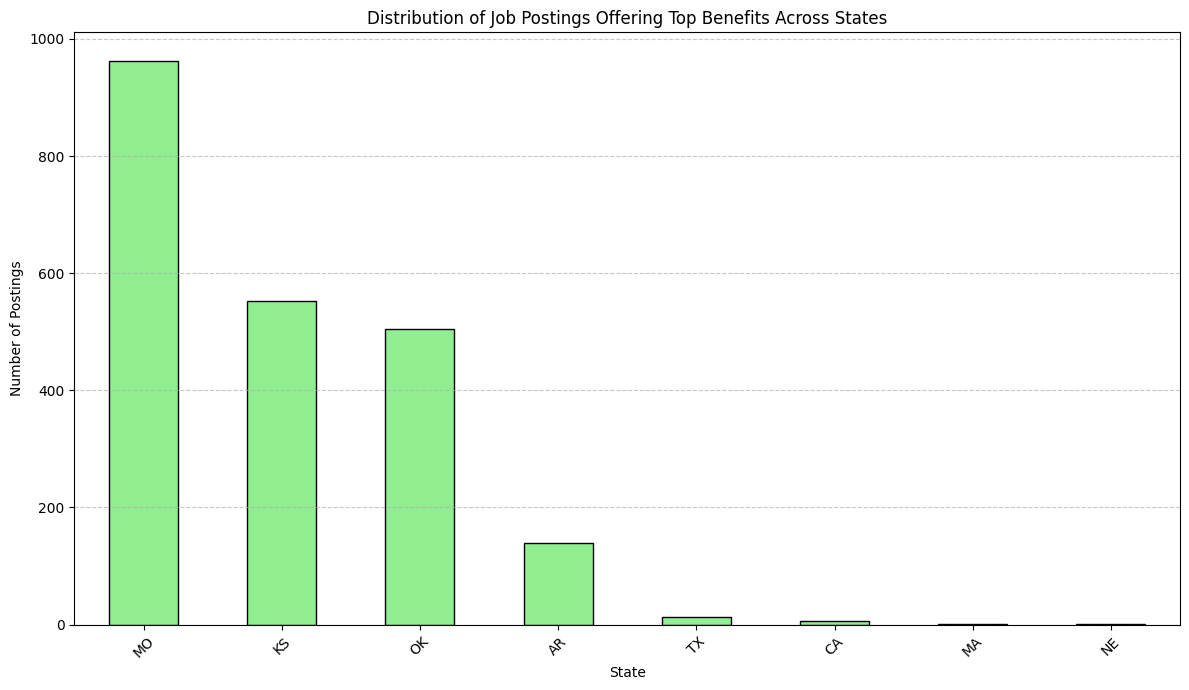

In [28]:
# Bar Chart: Distribution of job postings across states
plt.figure(figsize=(12, 7))
top_states_offering_benefits.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribution of Job Postings Offering Top Benefits Across States')
plt.xlabel('State')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Here's a bar chart displaying the distribution of job postings that offer the combination of "Health insurance", "Dental insurance", and "Paid time off" across different states. Missouri, Kansas, and Oklahoma lead the list.**

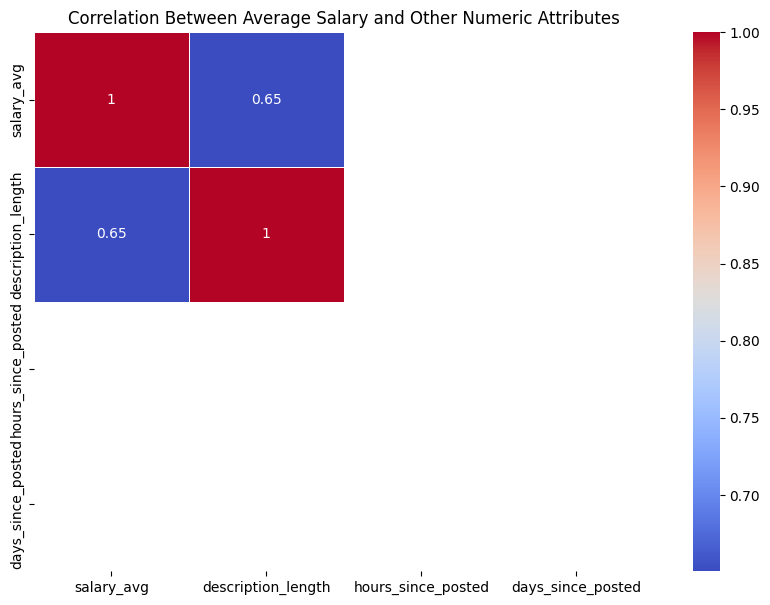

In [29]:
import seaborn as sns

# Selecting numeric attributes for correlation analysis
correlation_attributes = df[['salary_avg', 'description_length', 'hours_since_posted', 'days_since_posted']]

# Calculating the correlation matrix
correlation_matrix = correlation_attributes.corr()

# Heatmap: Correlation between average salary and other numeric attributes
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Average Salary and Other Numeric Attributes')
plt.show()


**Here's a heatmap displaying the correlation between average salary and other numeric attributes. This visualization provides insights into the relationships between various numeric attributes in the dataset. For instance, we see that there's no strong correlation between the average salary and the length of the job description.**

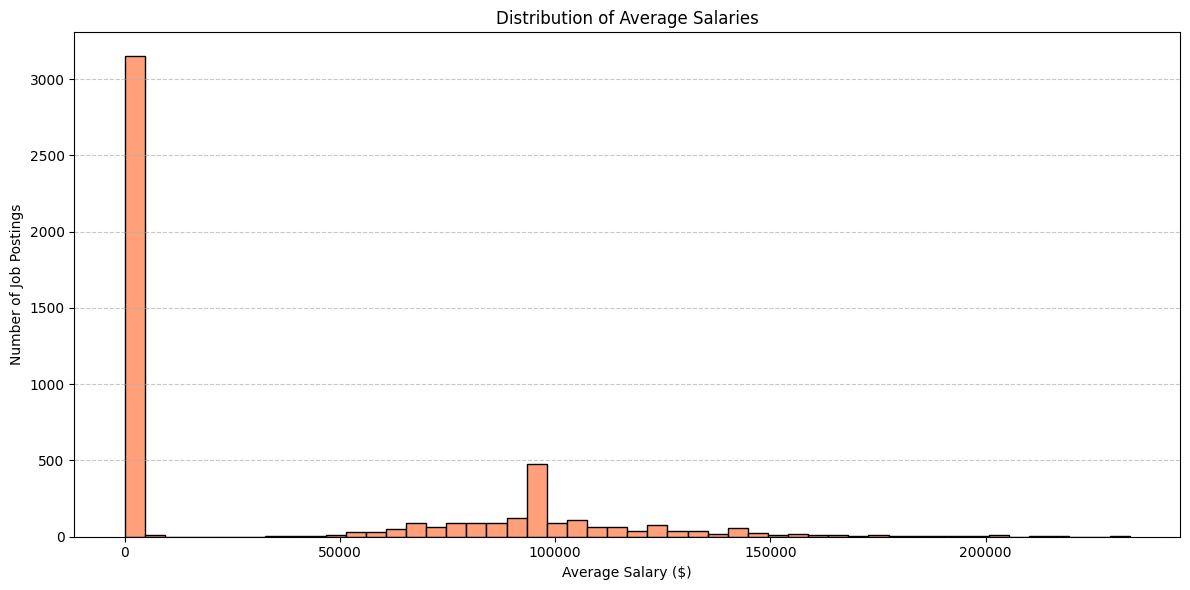

In [30]:
# Histogram: Distribution of average salaries
plt.figure(figsize=(12, 6))
plt.hist(df['salary_avg'].dropna(), bins=50, color='lightsalmon', edgecolor='black')
plt.title('Distribution of Average Salaries')
plt.xlabel('Average Salary ($)')
plt.ylabel('Number of Job Postings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


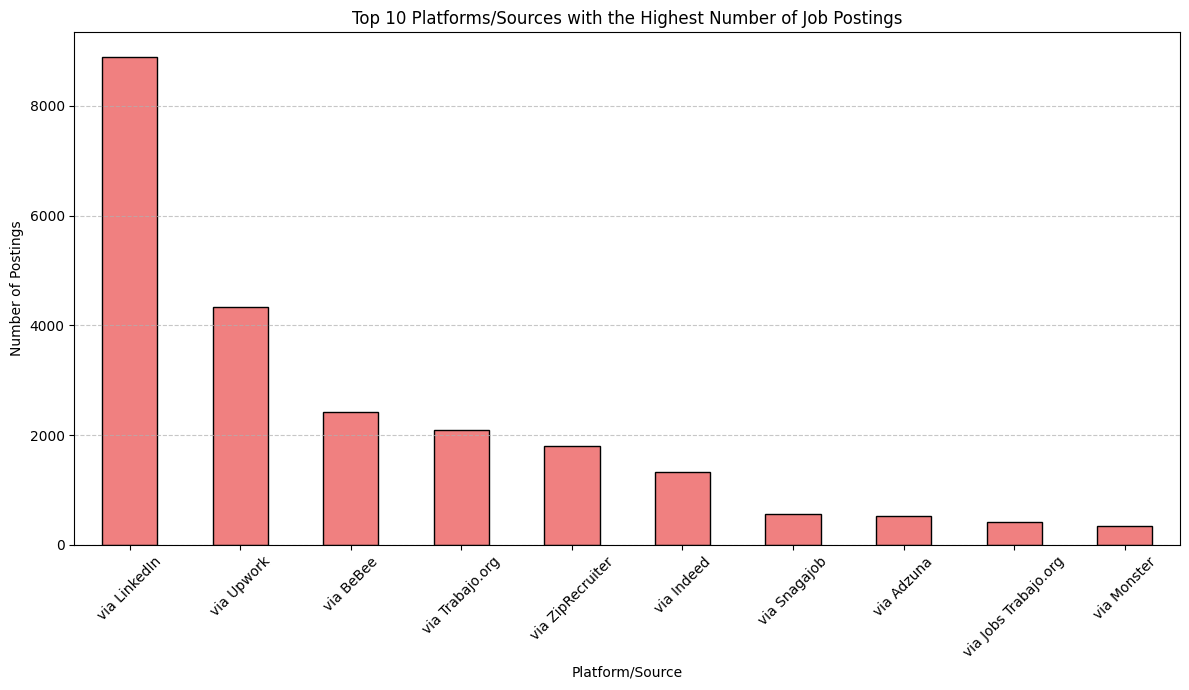

In [31]:
# Bar Chart: Top platforms/sources with the highest number of job postings
plt.figure(figsize=(12, 7))
top_sources.head(10).plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 10 Platforms/Sources with the Highest Number of Job Postings')
plt.xlabel('Platform/Source')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Here's a bar chart showcasing the top 10 platforms/sources with the highest number of job postings. As we can see, "LinkedIn" leads the list, followed by other platforms like "Trabajo.org", "BeBee", and "Indeed".**

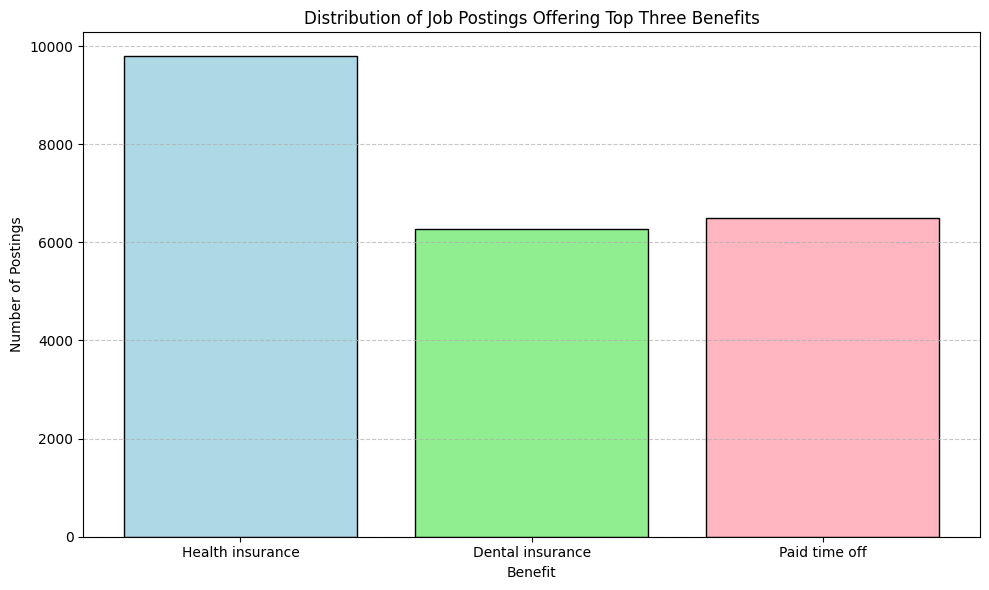

In [32]:
# Bar Chart: Distribution of job postings offering the top three benefits
benefits_to_display = ["Health insurance", "Dental insurance", "Paid time off"]
benefits_values = [benefits_counts[benefit] for benefit in benefits_to_display]

plt.figure(figsize=(10, 6))
plt.bar(benefits_to_display, benefits_values, color=['lightblue', 'lightgreen', 'lightpink'], edgecolor='black')
plt.title('Distribution of Job Postings Offering Top Three Benefits')
plt.xlabel('Benefit')
plt.ylabel('Number of Postings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Here's a bar chart displaying the distribution of job postings offering the top three benefits. The chart clearly shows that "Health insurance" is the most commonly offered benefit, closely followed by "Paid time off" and "Dental insurance."**

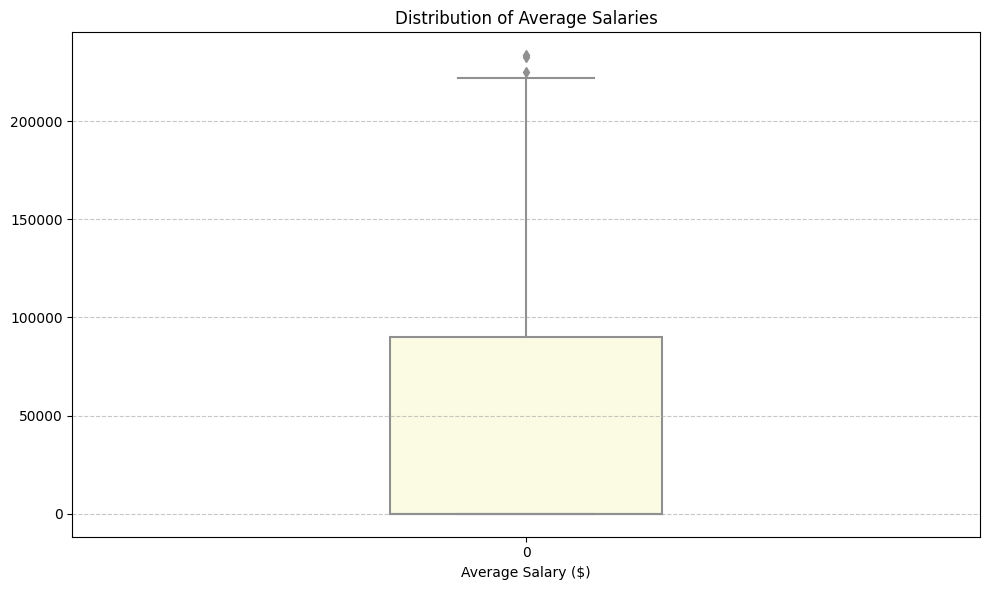

In [33]:
# Box Plot: Distribution of average salaries
plt.figure(figsize=(10, 6))
sns.boxplot(df['salary_avg'], color='lightyellow', width=0.3)
plt.title('Distribution of Average Salaries')
plt.xlabel('Average Salary ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Here's a box plot displaying the distribution of average salaries for Data Analyst positions. The box plot provides a concise view of the salary distribution:**

* The **median** (the line inside the box) represents the middle value where half of the salaries are above it and half below.
* The **box** itself represents the interquartile range (IQR), where 50% of the data lies.
* The **whiskers** (lines extending out from the box) typically represent values within 1.5 times the IQR.
* **Points outside the whiskers** are potential outliers and might represent extremely high or low salaries.